In [1]:
import pandas as pd
df = pd.read_csv('ADNI1_Complete_1Yr_3T_8_06_2021.csv')

In [2]:
import pandas as pd
import SimpleITK as sitk
import matplotlib.pyplot as plt
import numpy as np
import sys
import tensorflow as tf
import tensorflow.keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
from sklearn.metrics import plot_confusion_matrix
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split









In [ ]:
df.head()

In [ ]:
images = df['Image Data ID'].tolist()
df_2 = pd.DataFrame()
df_2['id'] = list(images)
df_2.head()

In [ ]:
def get_visit(subject):
    hold1 = df.loc[df['Image Data ID'] == subject]
    hold2 = hold1.iloc[0]
    visitnum = hold2['Visit']
    return visitnum

def get_Group(subject):
    hold1 = df.loc[df['Image Data ID'] == subject]
    hold2 = hold1.iloc[0]
    diag = hold2['Group']
    return diag

df_2['visit'] = df_2['id'].apply(get_visit)
df_2['diagnosis'] = df_2['id'].apply(get_Group)


In [ ]:
df_2.head()

In [ ]:
!pip install SimpleITK
import SimpleITK as sitk
def get_images(subject):
    path = 'Something/' + subject
    image = sitk.ReadImage(path)
    img = sitk.GetArrayFromImage(image)
    return img
df_2['images'] = df_2['id'].apply(get_images)

In [ ]:
test = df_2['images']
hold = test[3]
hold.shape

In [ ]:
img = hold[85]
import matplotlib.pyplot as plt
display(plt.imshow(img))

In [ ]:
img = hold[85]
import matplotlib.pyplot as plt
display(plt.imshow(img))

In [ ]:
import numpy as np
#30-140 by 10
def cut_set(images):
    hold_list = []
    i = 10
    while i < 141:
        hold_list.append(images[i])
        i += 10
    new = np.asarray(hold_list)
    return new

In [ ]:
df_2['images'] = df_2['images'].apply(cut_set)
df_2.head()

In [ ]:
test = df_2['images']
hold = test[24]
hold.shape

In [ ]:
img = hold[7]
import matplotlib.pyplot as plt
display(plt.imshow(img))

In [ ]:
#images can be reduced to 128,128 as a solid standard

In [ ]:
def resize_images(images):
    i = 0
    hold_list = []
    while i < 14:
        hold1 = images[i]
        hold2 = np.resize(hold1, (128,128))
        hold_list.append(hold2)
        i +=1
    new = np.asarray(hold_list)
    return new

In [ ]:
df_2['images'] = df_2['images'].apply(resize_images)

In [ ]:
def reshape_images(images):
    i = 0
    hold_list = []
    hold_array = np.array(hold_list)
    while i < 14:
        hold1 = images[i]
        hold2 = hold1.flatten()
        hold_array = np.append(hold_array, hold2)
        i +=1
    return hold_array

In [ ]:
df_2['images'] = df_2['images'].apply(reshape_images)

In [ ]:
df_2.to_csv('Something/Final_df?')

In [ ]:
df_2.head()

Due to labor of working with this data set, let's try a part 2 for this with the faved DF

In [ ]:
x = df_2['images']
y = df_2['diagnosis']
#22976

In [ ]:
x_array = x[0]
i = 1
while i < len(x):
    x_array = np.vstack([x_array, x[i]])
    i +=1

In [ ]:
x_array.shape

In [ ]:
def to_int(string):
    if string == 'MCI':
        return 'AD';
    elif string == 'AD':
        return 'AD'
    else:
        return 'CN'
y = y.apply(to_int)

In [ ]:
np.set_printoptions(threshold=sys.maxsize)
y

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 16)

In [ ]:
x_train.shape

In [ ]:
y_train

In [ ]:
x_train.shape

In [ ]:
import sys

np.set_printoptions(threshold=sys.maxsize)
x_train[11].sum()

In [ ]:
type(x_train)

In [ ]:
#AD = 80
#MCI = 240

In [ ]:
import tensorflow as tf
import tensorflow.keras 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Conv2D, Dropout
from tensorflow.keras import initializers
from tensorflow.keras import optimizers
model = Sequential()
model.add(Dense(units=32,activation = 'relu',input_shape=(229376, ),kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dense(units=1, activation = 'sigmoid'))



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy'])
history = model.fit(x_train, y_train, epochs=100,
                    validation_data=(x_test, y_test))

In [ ]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.base import ClassifierMixin

class SKWrapper(ClassifierMixin):
    
    def __init__(self, model):
        self.model = model
        self.classes = classes
    def predict(self, X):
        return (self.model.predict(X) > .5).astype(int)


In [ ]:
check = model.predict(x_train)

In [ ]:
check

In [ ]:
#compressing images more led to faster calcs and removed issue of naive prediction, this may be usable
#issues to adress: adjust learning rate, start from a random spot, make use of drop out, switch to cnn, imvestigate adressing the target variable

In [ ]:
10/10 [=============================] - 1s 63ms/step - loss: 0.6087 - recall: 0.0571 - val_loss: 0.6265 - val_recall: 0.5143

Right now there's a major issue in the model's prediction's being naive, and always predicting the same thing. To test this out let's try simplifying and building up the model slowly 

In [ ]:
simplehold = df_2.loc[(df_2['diagnosis'] == 'AD')|(df_2['diagnosis']=='MCI')]

In [ ]:
simplehold2 = simplehold.iloc[:50,:]

In [ ]:
x = simplehold2['images']
y = simplehold2['diagnosis']

x_array = x.iloc[0]
i = 1
while i < len(x):
    x_array = np.vstack([x_array, x.iloc[i]])
    i +=1

In [ ]:
x_array.shape

In [ ]:
def to_int(string):
    if string == 'MCI':
        return 'AD';
    elif string == 'AD':
        return 'AD'
    else:
        return 'CN'
y = y.apply(to_int)

In [ ]:
y

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(units=32,activation = 'relu',input_shape=(677600, ),kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dense(units=1, activation = 'sigmoid'))



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy'])
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))

This super simple model only has 1 class so should be perfect, which it is. Less try adding in 50 people who are fine and see how it adapts

In [ ]:
simplehold3 = df_2.loc[(df_2['diagnosis'] == 'CN')]
simplehold4 = simplehold3.iloc[:50,:]
simplehold5 = simplehold2.append(simplehold4)
simplehold5

In [ ]:
x = simplehold5['images']
y = simplehold5['diagnosis']

x_array = x.iloc[0]
i = 1
while i < len(x):
    x_array = np.vstack([x_array, x.iloc[i]])
    i +=1

In [ ]:
def to_int(string):
    if string == 'MCI':
        return 'AD';
    elif string == 'AD':
        return 'AD'
    else:
        return 'CN'
y = y.apply(to_int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 42)

In [ ]:
model = Sequential()
model.add(Dense(units=32,activation = 'relu',input_shape=(229376, ),kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dense(units=1, activation = 'sigmoid'))



In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy'])
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))

In [ ]:
#check = model.predict(x_train)


Based on this result, I believe that this model as is simply isn't going to properly work with the data as is and I'll need to try and revisit this from another direction

In [ ]:
df_2['id'] = list(images)
df_2.head()
def get_visit(subject):
    hold1 = df.loc[df['Image Data ID'] == subject]
    hold2 = hold1.iloc[0]
    visitnum = hold2['Visit']
    return visitnum

def get_Group(subject):
    hold1 = df.loc[df['Image Data ID'] == subject]
    hold2 = hold1.iloc[0]
    diag = hold2['Group']
    return diag

df_2['visit'] = df_2['id'].apply(get_visit)
df_2['diagnosis'] = df_2['id'].apply(get_Group)



nib is apparently a specilized package for nueroimaging, useful for this exact scenario

In [ ]:
import nibabel as nib
def get_images(subject):
    path = 'Something/' + subject +'.nii'
    image = nib.load(path)
    image_data = image.get_data()
    return image_data
df_2['images'] = df_2['id'].apply(get_images)

In [ ]:
df_2

In [ ]:
hold = df_2['images']
hold1 = hold[0]

In [ ]:
hold1.shape


In [ ]:
hold2 = hold1[128, 128, 85]
hold2

This data looks much more meaningful than what I was dealing with properly, we migh be onto something here, let's try adapting the previous methods to this new form. there are 256 vertical slices, for the sake of ease lets go by 10 for 20 slices, so capture 0,10,20,30,etc up to slice 200

In [ ]:
import numpy as np
#1-200 by 10
def cut_set(images):
    hold_list = []
    i = 0
    while i < 201:
        hold_list.append(images[i,:,:])
        i += 10
    new = np.asarray(hold_list)
    return new

In [ ]:
df_2['images'] = df_2['images'].apply(cut_set)

In [ ]:
def resize_images(images):
    i = 0
    hold_list = []
    while i < 19:
        hold1 = images[i]
        hold2 = np.resize(hold1, (128,128))
        hold_list.append(hold2)
        i +=1
    new = np.asarray(hold_list)
    return new

In [ ]:
df_2['images'] = df_2['images'].apply(resize_images)

In [ ]:
def reshape_images(images):
    i = 0
    hold_list = []
    hold_array = np.array(hold_list)
    while i < 14:
        hold1 = images[i]
        hold2 = hold1.flatten()
        hold_array = np.append(hold_array, hold2)
        i +=1
    return hold_array

In [ ]:
df_2['images'] = df_2['images'].apply(reshape_images)

In [ ]:
x = df_2['images']
y = df_2['diagnosis']

x_array = x.iloc[0]
i = 1
while i < len(x):
    x_array = np.vstack([x_array, x.iloc[i]])
    i +=1

In [ ]:
def to_int(string):
    if string == 'MCI':
        return 'AD';
    elif string == 'AD':
        return 'AD'
    else:
        return 'CN'
y = y.apply(to_int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 42)

In [23]:
model = Sequential()
model.add(Dense(units=32,activation = 'relu',input_shape=(229376, ),kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dropout(0.2))
model.add(Dense(units=32,activation = 'relu',kernel_initializer = initializers.RandomNormal(stddev=0.1),kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dense(units=1, activation = 'sigmoid'))




In [24]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['Accuracy'])
history = model.fit(x_train, y_train, epochs=50,
                    validation_data=(x_test, y_test))

Epoch 1/50


ValueError: in user code:

    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:747 train_step
        y_pred = self(x, training=True)
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    /opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/tensorflow/python/keras/engine/input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 229376 but received input with shape [None, 200, 200, 1]


It seems to me that this model set up, with combining images and such just isn't going to work, so it'll be back to the drawing board entirely for me

let's try going back to some of my originial work and make some adjustments for a CNN

In [3]:
images = df['Image Data ID'].tolist()
df_2 = pd.DataFrame()
df_2['id'] = list(images)
df_2.head()

,id
0,I99265
1,I79080
2,I66824
3,I82705
4,I40404


In [4]:
def get_visit(subject):
    hold1 = df.loc[df['Image Data ID'] == subject]
    hold2 = hold1.iloc[0]
    visitnum = hold2['Visit']
    return visitnum

def get_Group(subject):
    hold1 = df.loc[df['Image Data ID'] == subject]
    hold2 = hold1.iloc[0]
    diag = hold2['Group']
    return diag

df_2['visit'] = df_2['id'].apply(get_visit)
df_2['diagnosis'] = df_2['id'].apply(get_Group)



In [5]:
import SimpleITK as sitk
def get_images(subject):
    path = 'Something/' + subject
    image = sitk.ReadImage(path)
    img = sitk.GetArrayFromImage(image)
    return img
df_2['images'] = df_2['id'].apply(get_images)

This time for the sake of simplicity let's try using single images from slice 80 of each .nii file

In [ ]:
#try and make models for slice 96 and 66, stack models?

In [6]:
def reshape_images(images):
    hold1 = images[81]
    return hold1

In [7]:
df_2['images'] = df_2['images'].apply(reshape_images)

In [8]:
images = df_2['images']

In [9]:
hold = images[0]
hold.shape

(256, 256)

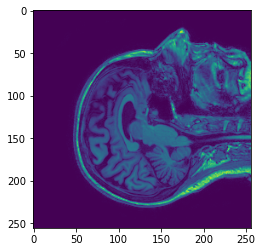

In [10]:
display(plt.imshow(hold))

In [11]:
import cv2
def resize_images(images):
    hold1 = images.copy()
    hold2 = cv2.resize(hold1,(200,200),interpolation=cv2.INTER_CUBIC)
    return hold2

In [12]:
df_2['images'] = df_2['images'].apply(resize_images)

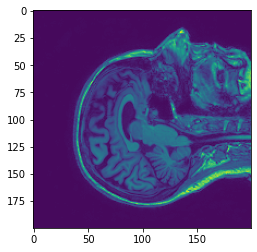

In [13]:
images = df_2['images']
test = images[0]
display(plt.imshow(test))

In [14]:
type(test)

numpy.ndarray

In [15]:
test.shape

(200, 200)

In [16]:
x = df_2['images']
y = df_2['diagnosis']

In [17]:
x_array = np.array(x)
x_array = np.stack(x_array)

In [18]:
x_array = x_array.reshape(420,200,200,1)

In [19]:
def to_int(string):
    if string == 'MCI':
        return 'AD';
    elif string == 'AD':
        return 'AD'
    else:
        return 'CN'
y = y.apply(to_int)

target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 42)

In [52]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [53]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))



In [54]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
10/10 [==============================] - 6s 615ms/step - loss: 307.8193 - accuracy: 0.5429 - val_loss: 0.8909 - val_accuracy: 0.6762
Epoch 2/10
10/10 [==============================] - 6s 643ms/step - loss: 0.5464 - accuracy: 0.7587 - val_loss: 0.7942 - val_accuracy: 0.7238
Epoch 3/10
10/10 [==============================] - 6s 577ms/step - loss: 0.2721 - accuracy: 0.8762 - val_loss: 1.2745 - val_accuracy: 0.7429
Epoch 4/10
10/10 [==============================] - 6s 597ms/step - loss: 0.1253 - accuracy: 0.9460 - val_loss: 1.2242 - val_accuracy: 0.7905
Epoch 5/10
10/10 [==============================] - 6s 571ms/step - loss: 0.0467 - accuracy: 0.9905 - val_loss: 1.7389 - val_accuracy: 0.7619
Epoch 6/10
10/10 [==============================] - 6s 577ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 1.7634 - val_accuracy: 0.7810
Epoch 7/10
10/10 [==============================] - 6s 564ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 1.9708 - val_accuracy: 0.7429
Epoc

In [56]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

TypeError: cannot pickle '_thread.RLock' object

In [58]:
json_file = model.to_json()
with open('model81.json', "w") as file:
   file.write(json_file)

model.save_weights('81weights.h5')

This score is pretty solid and much beyyer than what I was dealing with earlier, let's try and adjust for overfitting then see how it works out.

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1), kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dense(units=1, activation = 'sigmoid'))




In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

This was really not the effect I hoped for, let's try out a different strategy

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1), kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu', kernel_regularizer=keras.regularizers.l2(l2=0.01)))
model.add(Dense(units=1, activation = 'sigmoid'))



In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Recall'])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

In [ ]:
check = model.predict(x_train)
check

Yeah, really not working with drop down huh, let's go back to the pre-regularized/dropout model and limit the epochs see if ti works

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))



In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])
history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test))

In [ ]:
check = model.predict(x_train)
check

Decent at least, but while I'm here might as welll try using just drop out and see if it helps

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(Dense(units=1, activation = 'sigmoid'))




In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])
history2 = model2.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test))

Yeah drop out really fucks things up, low about we try and add/remove additional complexity to the model with hidden layers

In [21]:
model3 = models.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(Dense(units=1, activation = 'sigmoid'))




In [22]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])
history3 = model3.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test))

Epoch 1/15
10/10 [==============================] - 9s 854ms/step - loss: 2229.2991 - accuracy: 0.4476 - val_loss: 56.7291 - val_accuracy: 0.4000
Epoch 2/15
10/10 [==============================] - 7s 728ms/step - loss: 14.2298 - accuracy: 0.1778 - val_loss: 4.5841 - val_accuracy: 0.0000e+00
Epoch 3/15
10/10 [==============================] - 7s 689ms/step - loss: 1.0256 - accuracy: 0.0190 - val_loss: 1.7533 - val_accuracy: 0.0000e+00
Epoch 4/15
10/10 [==============================] - 7s 725ms/step - loss: 0.3005 - accuracy: 0.0254 - val_loss: 1.3864 - val_accuracy: 0.0000e+00
Epoch 5/15
10/10 [==============================] - 6s 564ms/step - loss: 0.1318 - accuracy: 0.0254 - val_loss: 1.3967 - val_accuracy: 0.0000e+00
Epoch 6/15
10/10 [==============================] - 6s 572ms/step - loss: 0.0551 - accuracy: 0.0286 - val_loss: 1.1555 - val_accuracy: 0.0000e+00
Epoch 7/15
10/10 [==============================] - 6s 563ms/step - loss: 0.0451 - accuracy: 0.0349 - val_loss: 2.5916 - va

This seems bad, 

.nii contains more info than a single image, to make use of this let's try traing models for differeing slices then stacking the results

In [37]:
images = df['Image Data ID'].tolist()
df_2 = pd.DataFrame()
df_2['id'] = list(images)
df_2.head()
df_2['visit'] = df_2['id'].apply(get_visit)
df_2['diagnosis'] = df_2['id'].apply(get_Group)
df_2['images'] = df_2['id'].apply(get_images)
def reshape_images(images):
    hold1 = images[96]
    return hold1


In [38]:
df_2['images'] = df_2['images'].apply(reshape_images)
df_2['images'] = df_2['images'].apply(resize_images)

In [39]:
x = df_2['images']
y = df_2['diagnosis']
x_array = np.array(x)
x_array = np.stack(x_array)
x_array = x_array.reshape(420,200,200,1)
y = y.apply(to_int)

target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)
x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 42)

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))



In [41]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
10/10 [==============================] - 7s 728ms/step - loss: 304.2444 - accuracy: 0.6127 - val_loss: 30.2707 - val_accuracy: 0.6571
Epoch 2/20
10/10 [==============================] - 6s 631ms/step - loss: 3.7864 - accuracy: 0.6667 - val_loss: 1.8644 - val_accuracy: 0.6952
Epoch 3/20
10/10 [==============================] - 6s 616ms/step - loss: 0.3150 - accuracy: 0.8762 - val_loss: 1.5186 - val_accuracy: 0.7048
Epoch 4/20
10/10 [==============================] - 6s 608ms/step - loss: 0.1624 - accuracy: 0.9524 - val_loss: 1.5081 - val_accuracy: 0.7238
Epoch 5/20
10/10 [==============================] - 7s 670ms/step - loss: 0.0984 - accuracy: 0.9778 - val_loss: 1.5766 - val_accuracy: 0.7333
Epoch 6/20
10/10 [==============================] - 6s 637ms/step - loss: 0.0318 - accuracy: 0.9968 - val_loss: 1.7243 - val_accuracy: 0.7143
Epoch 7/20
10/10 [==============================] - 6s 638ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 2.5558 - val_accuracy: 0.7048
Epo

In [42]:
json_file = model.to_json()
with open('model96.json', "w") as file:
   file.write(json_file)

now for the other direction slice

In [43]:
images = df['Image Data ID'].tolist()
df_2 = pd.DataFrame()
df_2['id'] = list(images)
df_2.head()
df_2['visit'] = df_2['id'].apply(get_visit)
df_2['diagnosis'] = df_2['id'].apply(get_Group)
df_2['images'] = df_2['id'].apply(get_images)
def reshape_images(images):
    hold1 = images[66]
    return hold1
df_2['images'] = df_2['images'].apply(reshape_images)
df_2['images'] = df_2['images'].apply(resize_images)


In [44]:
x = df_2['images']
y = df_2['diagnosis']
x_array = np.array(x)
x_array = np.stack(x_array)
x_array = x_array.reshape(420,200,200,1)
y = y.apply(to_int)

target_encoder = LabelEncoder()
target_encoder.fit(y)
y = target_encoder.transform(y)
x_train, x_test, y_train, y_test = train_test_split(x_array, y, random_state = 42)

In [45]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(units=1, activation = 'sigmoid'))



In [46]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20,
                    validation_data=(x_test, y_test))

Epoch 1/20
10/10 [==============================] - 7s 692ms/step - loss: 305.9434 - accuracy: 0.5905 - val_loss: 4.5941 - val_accuracy: 0.6476
Epoch 2/20
10/10 [==============================] - 6s 619ms/step - loss: 1.2257 - accuracy: 0.7365 - val_loss: 1.0924 - val_accuracy: 0.5714
Epoch 3/20
10/10 [==============================] - 8s 790ms/step - loss: 0.4831 - accuracy: 0.7714 - val_loss: 0.9103 - val_accuracy: 0.5714
Epoch 4/20
10/10 [==============================] - 7s 712ms/step - loss: 0.3457 - accuracy: 0.8413 - val_loss: 1.2542 - val_accuracy: 0.6381
Epoch 5/20
10/10 [==============================] - 10s 966ms/step - loss: 0.1905 - accuracy: 0.9333 - val_loss: 1.3078 - val_accuracy: 0.6952
Epoch 6/20
10/10 [==============================] - 8s 846ms/step - loss: 0.0759 - accuracy: 0.9714 - val_loss: 1.7396 - val_accuracy: 0.6952
Epoch 7/20
10/10 [==============================] - 8s 793ms/step - loss: 0.0425 - accuracy: 0.9873 - val_loss: 1.8566 - val_accuracy: 0.6762
Epo

In [48]:
json_file = model.to_json()
with open('model66.json', "w") as file:
   file.write(json_file)

model.save_weights('66weights.h5')

In [ ]:
from keras.models import model_from_json


def custom_predict(y_list):
    hold = 0
    model 

In [50]:
from keras.models import model_from_json


def get_model(json_file, h5_file):
    file = open(json_file, 'r')
    model_json = file.read()
    file.close()
    loaded_model = model_from_json(model_json)
    # load weights
    loaded_model.load_weights(h5_file)
    return loaded_model

test = get_model('model66.json', '66weights.h5') 

In [51]:
test.predict(x_test)

array([[1.60792169e-07],
       [9.09519970e-01],
       [9.51602817e-01],
       [9.99582529e-01],
       [9.99997735e-01],
       [4.81913112e-30],
       [8.11108992e-13],
       [2.38796876e-08],
       [9.09198139e-09],
       [0.00000000e+00],
       [0.00000000e+00],
       [9.60009456e-01],
       [6.38152361e-02],
       [3.64399850e-02],
       [8.03182423e-02],
       [3.28122616e-01],
       [4.21199758e-07],
       [9.99995708e-01],
       [4.69306633e-06],
       [9.99974668e-01],
       [3.29111771e-07],
       [1.79304322e-14],
       [1.07319664e-09],
       [9.99999225e-01],
       [7.59291351e-02],
       [1.44343972e-02],
       [4.67034261e-05],
       [6.25781471e-09],
       [8.42564987e-08],
       [4.59849342e-14],
       [9.96577322e-01],
       [7.72207975e-04],
       [8.79896850e-12],
       [8.18875432e-03],
       [1.71362376e-06],
       [6.80842049e-10],
       [1.01483442e-06],
       [9.99990046e-01],
       [1.15402507e-10],
       [1.08767162e-12],
